# US AIRPORT DATA [MORE DETAIL OF DATA SET....)

### Characterizing Complex Networks

6/03/20

- Microscale
    * Degree
    * Centrality 
    * Global Perspective

In [53]:
import networkx as nx
import numpy as np
import numpy.linalg
from collections import Counter
from networkx.algorithms import community
import pandas as pd

In [8]:
G = nx.read_weighted_edgelist(r'USairport_2010.dl')

Number of nodes in the network:

In [9]:
len(G)

1574

Number of edges in the network:

In [10]:
G.number_of_edges()

17215

In [11]:
import matplotlib.pyplot as plt

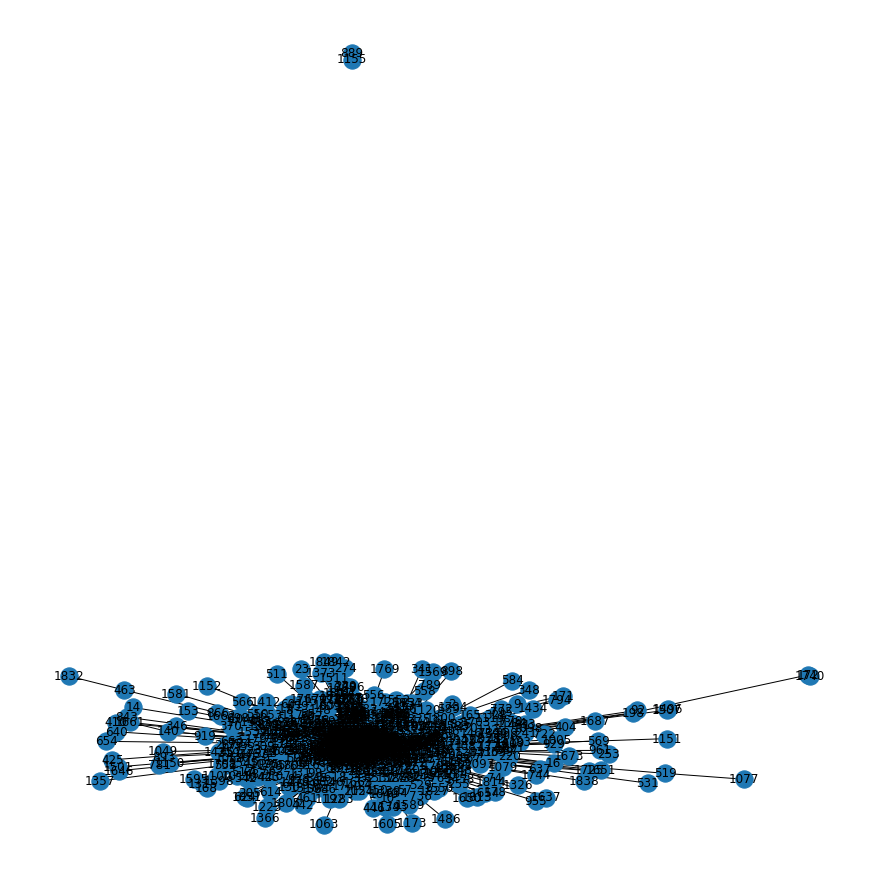

In [12]:
plt.figure(figsize=(12,12)) 
nx.draw(G, with_labels=True, font_weight='normal')

In [13]:
pos_pb = nx.spring_layout(G)

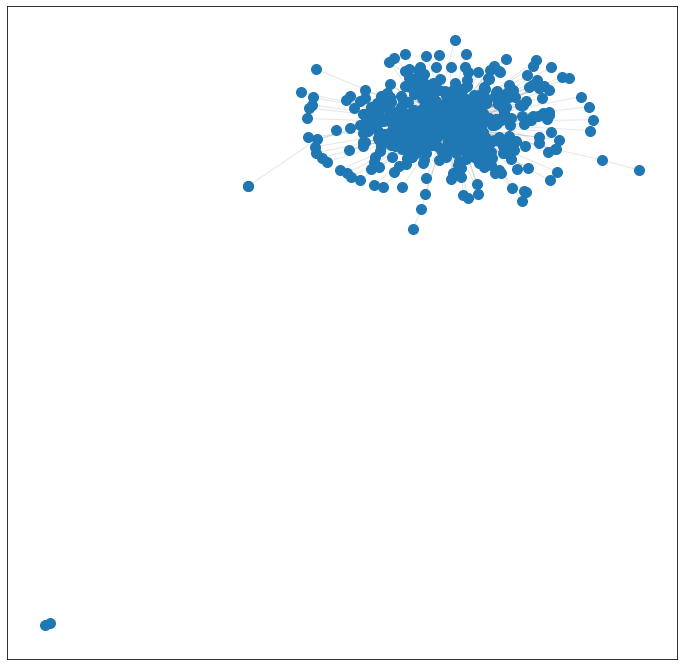

In [14]:
plt.figure(figsize=(12,12))
nodes = nx.draw_networkx_nodes (G , pos = pos_pb, node_size=100)
edges = nx.draw_networkx_edges (G , pos = pos_pb, alpha = 0.1)

To find the adjacency matrix (to show which nodes a given node is directly connected to):

In [15]:
nx.algorithms.isolate.number_of_isolates(G)

0

#### Adjacency and Laplacian Matrix 

In [16]:
A = nx.adj_matrix(G)

In [17]:
A.shape

(1574, 1574)

In [22]:
A.data.nbytes

275440

To find the Laplacian matrix:

In [18]:
L = nx.laplacian_matrix(G)

In [21]:
L.data.nbytes

288032

# Degree

To calculate the degree centrality of each node (how many links each node has normalized by dividing by the maximum possible degree):

In [23]:
DC=nx.degree_centrality(G)

To identify the 10 nodes with highest degree centrality:

In [24]:
dict(Counter(DC).most_common(10))

{'114': 0.19961856325492688,
 '709': 0.19008264462809918,
 '1200': 0.18817546090273363,
 '877': 0.1856325492689129,
 '766': 0.18499682136045772,
 '389': 0.17418944691671964,
 '500': 0.17355371900826447,
 '1068': 0.17101080737444374,
 '711': 0.1697393515575334,
 '1016': 0.1659249841068023}

As our network is undirected, the following two measures are not relevant:

In [25]:
#IDC=nx.in_degree_centrality(G)

In [26]:
#ODC=nx.out_degree_centrality(G)

# Closeness

To compute closeness centrality (average distance from a given node to all other nodes, normalised by the sum of minimum possible distances):

In [27]:
CC=nx.closeness_centrality(G)

To identify the 10 nodes with highest closeness centrality:

In [28]:
dict(Counter(CC).most_common(10))

{'114': 0.49777999457856403,
 '877': 0.49464140697088077,
 '1068': 0.49417402926350673,
 '389': 0.49000704025972325,
 '709': 0.48939567776407794,
 '766': 0.4851584857488045,
 '982': 0.48500851403759937,
 '1200': 0.4838120699696682,
 '500': 0.48128912359252574,
 '711': 0.4806993084900839}

# Betweeness

To compute betweenness centrality (measure of the influence of a node over the flow of information between every pair of ndoes):

In [29]:
BC=nx.betweenness_centrality(G)

To identify the 10 nodes with highest betweenness centrality:

In [30]:
dict(Counter(BC).most_common(10))

{'88': 0.21612697041610074,
 '505': 0.0910798547774605,
 '877': 0.05784203528825084,
 '766': 0.05761920149221005,
 '1016': 0.05269497029630838,
 '1433': 0.05262689939317822,
 '685': 0.05160207925993114,
 '389': 0.05058791867337552,
 '114': 0.04634170713506602,
 '1068': 0.042751395077417216}

In [31]:
EBC=nx.edge_betweenness_centrality(G)

To identify the 10 edges with highest betweenness centrality:

In [32]:
dict(Counter(EBC).most_common(10))

{('47', '88'): 0.020632806664735933,
 ('70', '1433'): 0.015639356547341905,
 ('88', '1016'): 0.012150294115807932,
 ('505', '114'): 0.01072903540298153,
 ('1822', '921'): 0.01047117166286991,
 ('505', '766'): 0.010301482595725466,
 ('505', '877'): 0.009765937626108535,
 ('679', '88'): 0.009708576637158801,
 ('1240', '802'): 0.00963160713688633,
 ('88', '709'): 0.009578160413943628}

# Eigenvector Centrality

To find the eigenvector_centrality of each node (the importance of each node based on the importance of nodes it is connected to).

High Eigenvector centrality identifies nodes that are surrounded by other nodes with high eigenvector centrality. This measure helps to locate groups of interconnected nodes with high prestige.

In [33]:
E_CT=nx.eigenvector_centrality(G)

To identify the 10 nodes with highest eigenvector centrality score:

In [34]:
dict(Counter(E_CT).most_common(10))

{'1200': 0.11825493026777034,
 '114': 0.11539964929681931,
 '435': 0.11502842517245333,
 '709': 0.11325891582359723,
 '1068': 0.11309294644137256,
 '391': 0.1119492638186437,
 '1252': 0.11088870154947708,
 '711': 0.11029295687227372,
 '500': 0.10776159003989608,
 '206': 0.10727666917403335}

We get the same answer by applying the eigenvector_centrality_numpy command

In [35]:
E_CT_NP=nx.eigenvector_centrality_numpy(G)

In [36]:
dict(Counter(E_CT_NP).most_common(10))

{'1200': 0.11825432362054306,
 '114': 0.11539896428671906,
 '435': 0.11502815298802219,
 '709': 0.11325836249283722,
 '1068': 0.11309243576653089,
 '391': 0.11194870157442058,
 '1252': 0.11088828083713662,
 '711': 0.11029237669069593,
 '500': 0.10776080208418137,
 '206': 0.1072767911382821}

To find Katz centrality (relative influence of a node within a network by measuring the number of the immediate neighbours and also all other nodes in the network that connect to the node under consideration through these immediate neighbors):

In [37]:
#KATZ_C=nx.katz_centrality(G) Will not compute - perhaps because of two unconnected nodes?

In [38]:
KATZ_C_np=nx.katz_centrality_numpy(G)

To identify the 10 nodes with highest KATZ centrality score:

In [39]:
dict(Counter(KATZ_C_np).most_common(10))

{'875': 0.15468816341187885,
 '1411': 0.13959673020181584,
 '452': 0.1217266507300894,
 '1374': 0.11709962504730172,
 '246': 0.11522402587640815,
 '435': 0.11475787802141299,
 '344': 0.11467879401572595,
 '731': 0.10987594598693455,
 '1462': 0.10714211473123166,
 '1611': 0.09696002019335999}

# Communicability

In [38]:
C=nx.communicability(G) #Will not compute - perhaps because of two unconnected nodes?

KeyboardInterrupt: 

In [44]:
?nx.communicability

In [45]:
CExp=nx.communicability_exp(G)

In [46]:
CCentrality=nx.communicability_centrality(G)

AttributeError: module 'networkx' has no attribute 'communicability_centrality'

In [81]:
CCentrality_exp=nx.communicability_centrality_exp(G)

AttributeError: module 'networkx' has no attribute 'communicability_centrality_exp'

The below may not work because of the two unconnected nodes?

In [82]:
CCentrality_exp=nx.communicability_betweenness_centrality(G)

/Users/pennytarling/anaconda3/lib/python3.7/site-packages/networkx/algorithms/centrality/subgraph_alg.py:246: RuntimeWarning: divide by zero encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA
/Users/pennytarling/anaconda3/lib/python3.7/site-packages/networkx/algorithms/centrality/subgraph_alg.py:246: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA


KeyboardInterrupt: 

In [ ]:
EI=nx.estrada_index(G)

# PageRank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. 

In [48]:
PR=nx.pagerank(G)

In [50]:
?nx.pagerank

In [51]:
type(PR)

dict

In [59]:
PR_df = pd.DataFrame.from_dict(PR, orient = 'index')
PR_df.rename(columns= {0:'PR rank'}, inplace = True)

In [62]:
PR_df.sort_values(by= ['PR rank'], ascending=False).head(10)

,PR rank
114,0.036547
1200,0.028017
877,0.026272
389,0.023899
391,0.023071
1433,0.022618
766,0.022559
88,0.022149
711,0.017871
1437,0.017381


# Clustering

In [63]:
TRIANGLES=nx.triangles(G)

In [73]:
TRIANGLES

{'1': 1,
 '47': 53,
 '832': 18,
 '2': 0,
 '679': 36,
 '3': 1,
 '424': 7,
 '1688': 16,
 '4': 0,
 '685': 3268,
 '6': 1,
 '7': 0,
 '8': 1,
 '1217': 255,
 '1729': 83,
 '9': 0,
 '91': 221,
 '11': 2,
 '1494': 5,
 '12': 5,
 '227': 88,
 '505': 644,
 '509': 127,
 '13': 0,
 '15': 0,
 '16': 1,
 '844': 401,
 '17': 0,
 '19': 0,
 '20': 13,
 '70': 216,
 '88': 1370,
 '464': 77,
 '1131': 27,
 '1262': 70,
 '1652': 21,
 '1739': 19,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '27': 1,
 '1416': 45,
 '29': 2509,
 '78': 40,
 '114': 9036,
 '117': 1831,
 '134': 768,
 '169': 6728,
 '173': 35,
 '206': 8095,
 '296': 3776,
 '300': 2015,
 '311': 7841,
 '317': 7218,
 '381': 4525,
 '391': 8639,
 '403': 1330,
 '432': 5023,
 '435': 9110,
 '489': 508,
 '526': 6327,
 '534': 2057,
 '576': 483,
 '609': 2507,
 '610': 2874,
 '619': 3293,
 '691': 3604,
 '709': 8755,
 '716': 4582,
 '727': 1955,
 '731': 7313,
 '760': 4802,
 '766': 5741,
 '880': 12,
 '899': 3207,
 '902': 7024,
 '918': 5432,
 '978': 6987,
 '982': 7639,
 '989': 6331,

In [77]:
TRANSITIVITY=nx.transitivity(G)

In [80]:
?nx.transitivity

In [79]:
TRANSITIVITY

0.38414344664491556

In [81]:
CLUSTERING=nx.clustering(G)

In [84]:
?nx.clustering

In [85]:
A_CLUSTERING=nx.average_clustering(G)

In [86]:
A_CLUSTERING

0.5041525392095769

# Shortest paths

In [88]:
SP=nx.shortest_path(G)